In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## дискретная случайная величина, значения: [-inf..inf], $p(x) = |x^{-6}|$
### пятый момент равен сумме $x^{-1}$, то есть расходится, предыдущие сходятся

(-6, 6)

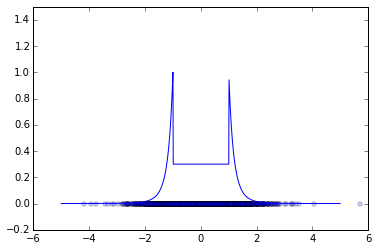

In [148]:
N = 10000
from scipy.stats import rv_continuous
class my_distr(rv_continuous):
    def _pdf(self, k):
        if (abs(k) >= 1):
            return abs(k)**(-6)
        else:
            return 3.0/10.0
    
distr = my_distr(name='lal')

X = np.arange(-5, 5, .01)
y = np.array([distr.pdf(x) for x in X])
plt.plot(X, y)

bigSample = distr.rvs(size=N)
yzeros = np.array([0]*N)
plt.scatter(bigSample, yzeros,alpha=.2, marker='o')

plt.ylim(-.2, 1.5)
plt.xlim(-6, 6)

In [92]:
#проверим, что плотность корректная 
from scipy.integrate import quad
ans, err = quad(distr.pdf, -np.inf, np.inf)
print ans

1.0


### Ex = 0, Ex^2 = 1/3 + 1/3 + 1/5 = 13/15 ~ 0.86666666 -> Dx = Ex^2

(0, 0.1)

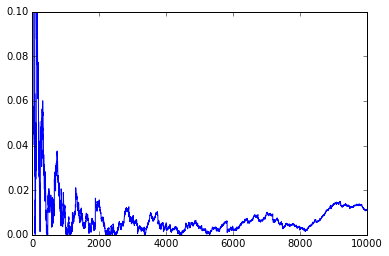

In [134]:
trueDisp = 2./3 + 1./5

def eval(X):
    return (X**2.).sum()/len(X) - ((X.sum())/len(X))**2.

numbers = np.arange(1, N)
y = np.array([])
for n in numbers:
    sample = bigSample[:n]
    y = np.append(y, abs(eval(sample) - trueDisp))
plt.plot(numbers, y)
plt.ylim(0, .1)

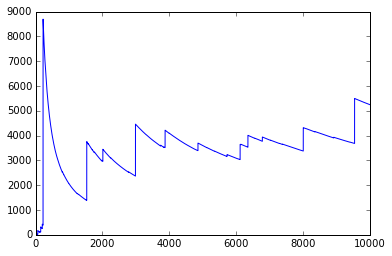

In [140]:
cdist = sts.cauchy()
bigSample = cdist.rvs(N)
y = np.array([])
for n in numbers:
    sample = bigSample[:n]
    y = np.append(y, eval(sample))
plt.plot(numbers, y)
# plt.ylim(0, .1)